In [1]:
import mne                                                              # Librería de python para explorar, visualizar,
mne.set_log_level('WARNING')                                            # y analizar datos neurofisiológicos humanos.
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb                                                    
color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas

import a_funciones as a_fun                                             # Funciones Alex

xlabel = 'Muestra'                                                      # Abscisas
ylabel = 'Amplitud (uV)'                                                # Ordenadas

#### Análisis de la señal ERPTemplate
ERPTemplate, como estructura de datos, contiene sólo un array útil para éste estudio: 'routput'.  
'routput' contiene la plantila de un ERP. Vienen 8 canales y son modificados en su sampleo de frecuencia de 256Hz a 250Hz.  


In [2]:
#---------------------------------------------------------
#---------- Carga y preparación del ERPTemplate ----------
#---------------------------------------------------------
ERPTemplate = scipy.io.loadmat('./dataset/ERPTemplate.mat') 
print("-----------------------------------------")   
print("ERPTemplate:")   
print("1. Encabezado : ", sorted(ERPTemplate))                                      #Informativo
print("2. Tipo : ", type(ERPTemplate))
routput = ERPTemplate['routput']
erptemplate1 = routput[0][7][0][1][0][0][0][7] 
erptemplate1 = np.delete( erptemplate1, range(0,256,43),0)

print("-----------------------------------------")   
print("erptemplate1:")   
# print("1. Encabezado : ", sorted(erptemplate1))                                      #Informativo
print("2. Tipo : ", type(erptemplate1))
print("3. Tamaño : ", len(erptemplate1))
print("3. Lo que hay en un campo : ", erptemplate1[0])
print("4. Tipo de lo que hay en un campo : ", type(erptemplate1[0]))
print("-----------------------------------------")   

df_erptemplate1 = a_fun.to_df(erptemplate1)

#-----------------------------------------------------------------
#---------- Carga y preparación de la función gaussiana ---------- 
#-----------------------------------------------------------------

# Parámetros
mu = 0      # Media
sigma = 30   # Desviación estándar
amplitud = 700  # Amplitud

# Generar valores x
# x = np.linspace(-5, 5, 100)
x = np.linspace(-125, 125, 250)
# Calcular los valores de la función gaussiana
f_gauss = amplitud * (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu)**2) / (2 * sigma**2))

df_f_gauss = a_fun.to_df(f_gauss)

print("-----------------------------------------")   
print("x:")   
# print("1. Encabezado : ", sorted(erptemplate1))                                      #Informativo
print("2. Tipo : ", type(x))
print("3. Tamaño : ", len(x))
print("-----------------------------------------") 

-----------------------------------------
ERPTemplate:
1. Encabezado :  ['__globals__', '__header__', '__version__', 'routput']
2. Tipo :  <class 'dict'>
-----------------------------------------
erptemplate1:
2. Tipo :  <class 'numpy.ndarray'>
3. Tamaño :  250
3. Lo que hay en un campo :  [-1.02069253 -0.58622832  0.21527186  0.2975234   0.44664961 -0.02260378
  1.09009003  0.16823809]
4. Tipo de lo que hay en un campo :  <class 'numpy.ndarray'>
-----------------------------------------
-----------------------------------------
x:
2. Tipo :  <class 'numpy.ndarray'>
3. Tamaño :  250
-----------------------------------------


In [3]:
f_gaussx8 = np.empty((250,8), dtype=np.float64)
print("-----------------------------------------")   
print("Gaussiana : ")
print("Tipo : ", type(f_gaussx8))
print("Tamaño : ", len(f_gaussx8))
print("Forma del erptemplate1:", f_gaussx8.shape)
print("Tipo de datos de erptemplate1:", f_gaussx8.dtype)
print("-----------------------------------------")   
#temp_array = np.array([f_gauss[i], f_gauss[i], f_gauss[i], f_gauss[i], f_gauss[i], f_gauss[i], f_gauss[i], f_gauss[i]], dtype=float)


-----------------------------------------
Gaussiana : 
Tipo :  <class 'numpy.ndarray'>
Tamaño :  250
Forma del erptemplate1: (250, 8)
Tipo de datos de erptemplate1: float64
-----------------------------------------


In [4]:
f_gaussx8 = np.empty((250,8), dtype=np.float64)
#f_gaussx8 = np.empty(250, dtype=object)
#f_gaussx8 = np.empty(250, dtype=np.float64)
#f_gaussx8 = np.linspace(-128, 128, 250)
#temp_array = np.array([f_gauss[125], f_gauss[125], f_gauss[125], f_gauss[125], f_gauss[125], f_gauss[125], f_gauss[125], f_gauss[125]])
temp_array = ([f_gauss[125], f_gauss[125], f_gauss[125], f_gauss[125], f_gauss[125], f_gauss[125], f_gauss[125], f_gauss[125]])
print("temp_array : ", temp_array)

for i in range(0,249):
        temp_array = np.array([f_gauss[i], f_gauss[i], f_gauss[i], f_gauss[i], f_gauss[i], f_gauss[i], f_gauss[i], f_gauss[i]], dtype=float)
        #temp_array = ([f_gauss[i], f_gauss[i], f_gauss[i], f_gauss[i], f_gauss[i], f_gauss[i], f_gauss[i], f_gauss[i]])
        f_gaussx8[i]=temp_array

df_f_gaussx8 = a_fun.to_df(f_gaussx8)
print("-----------------------------------------")   
print("erptemplate1:")   
print("-----------------------------------------")   
print("Tipo : ", type(erptemplate1))
print("Tamaño : ", len(erptemplate1))
print("Forma del erptemplate1:", erptemplate1.shape)
print("Tipo de datos de erptemplate1:", erptemplate1.dtype)
print("----------------------")   
print("Lo que hay en un campo : ", erptemplate1[0])
print("Tipo de lo que hay en un campo : ", type(erptemplate1[0]))
print("Tamaño de lo que hay en un campo : ", len(erptemplate1[0]))
print("Forma del erptemplate1[0]:", erptemplate1[0].shape)
print("Tipo de datos de erptemplate1[0]:", erptemplate1[0].dtype)
print("---")   
print("---")   
print("---")   
print("-----------------------------------------")   
print("Gaussiana : ")
print("Tipo : ", type(f_gaussx8))
print("Tamaño : ", len(f_gaussx8))
print("Forma del erptemplate1:", f_gaussx8.shape)
print("Tipo de datos de erptemplate1:", f_gaussx8.dtype)
print("----------------------")   
print("Lo que hay en un campo: ", f_gaussx8[125])
print("Tipo de lo que hay en un campo: ", type(f_gaussx8[125]))
print("Tamaño de lo que hay en un campo : ", len(f_gaussx8[125]))
print("Forma del f_gaussx8:", f_gaussx8[125].shape)
print("Tipo de datos de f_gaussx8:", f_gaussx8[125].dtype)


print("-----------------------------------------")   
#df_f_gaussx8 = a_fun.to_df(f_gaussx8)
#df_f_gaussx8

temp_array :  [9.307350026756405, 9.307350026756405, 9.307350026756405, 9.307350026756405, 9.307350026756405, 9.307350026756405, 9.307350026756405, 9.307350026756405]
-----------------------------------------
erptemplate1:
-----------------------------------------
Tipo :  <class 'numpy.ndarray'>
Tamaño :  250
Forma del erptemplate1: (250, 8)
Tipo de datos de erptemplate1: float64
----------------------
Lo que hay en un campo :  [-1.02069253 -0.58622832  0.21527186  0.2975234   0.44664961 -0.02260378
  1.09009003  0.16823809]
Tipo de lo que hay en un campo :  <class 'numpy.ndarray'>
Tamaño de lo que hay en un campo :  8
Forma del erptemplate1[0]: (8,)
Tipo de datos de erptemplate1[0]: float64
---
---
---
-----------------------------------------
Gaussiana : 
Tipo :  <class 'numpy.ndarray'>
Tamaño :  250
Forma del erptemplate1: (250, 8)
Tipo de datos de erptemplate1: float64
----------------------
Lo que hay en un campo:  [9.30735003 9.30735003 9.30735003 9.30735003 9.30735003 9.30735003

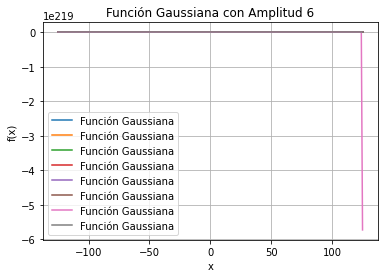

In [5]:
# Crear el gráfico
plt.plot(x, f_gaussx8, label='Función Gaussiana')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función Gaussiana con Amplitud 6')
plt.legend()
plt.grid(True)
plt.show()


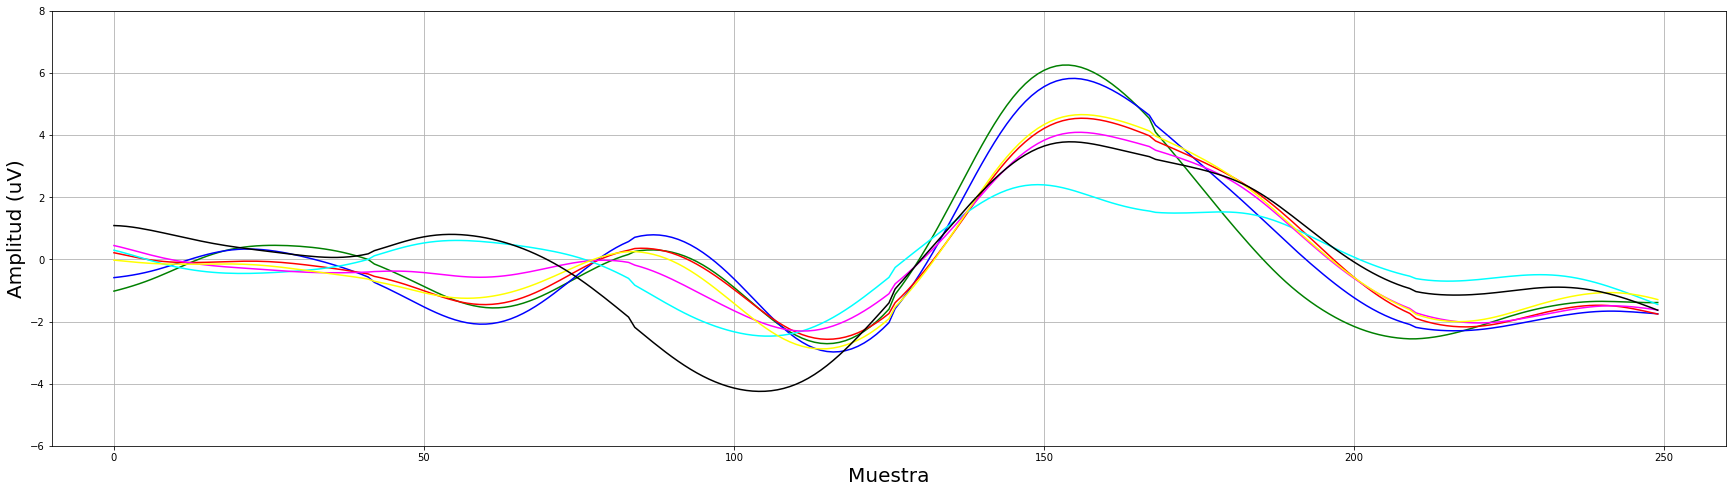

(None, None)

In [6]:
plt.figure(figsize=(30,8))                                          
axes = plt.gca()                                                    
for i in range(0,7):
    plt.plot(df_erptemplate1['sample'], df_erptemplate1[i], color[i])
#axes.set_title('Señal obtenida, Event-related potential1: 8 canales en una misma imagen'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.savefig("./a_images/ERPTemplate.jpg")
plt.axis((-10,260,-6,8))  #plt.xlim([0,100]), plt.ylim([0.9,2.1])                                            
plt.grid(), plt.show()

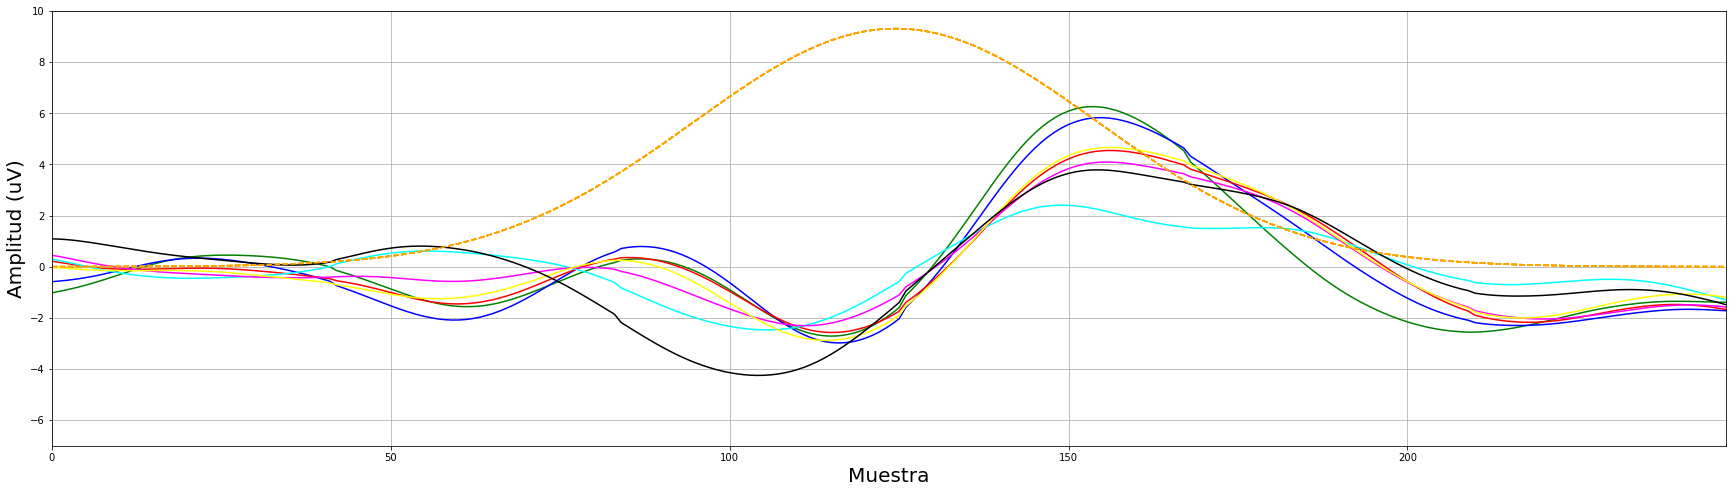

(None, None)

In [14]:
plt.figure(figsize=(30,8))                                          
axes = plt.gca()                                                    
for i in range(0,7):
    plt.plot(df_erptemplate1['sample'], df_erptemplate1[i], color[i])
    plt.plot(df_f_gaussx8['sample'], df_f_gaussx8[i], linestyle='--', linewidth=1.5, color='orange')
#axes.set_title('Señal obtenida, Event-related potential1: 8 canales en una misma imagen'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.savefig("./a_images/ERPTemplate_con_Gauss.jpg")
plt.axis((0,247,-7,10))  #plt.xlim([0,100]), plt.ylim([0.9,2.1])                                            
plt.grid(), plt.show()

In [ ]:
erptemplate1

In [ ]:
punto_mat = scipy.io.loadmat('./dataset/itba/P300S01.mat') 
signal = punto_mat['data'][0][0][0] 
len(signal)